In [1]:
# from map_evaluation import P_wrapper, Evaluator, NNinv_keras, NNinv_torch, MapBuilder
import sys
import os
sys.path.append('../sdbm/code/')
sys.path.append('../DeepView/deepview/')
sys.path.append('../dbm_evaluation/')
from map_evaluation import MapBuilder #P_wrapper, Evaluator, NNinv_keras, NNinv_torch, 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE, MDS
# import make blobs
from sklearn.datasets import make_blobs, load_iris
from lamp import Pinv_ilamp
from NNinv import NNinv_torch
from rbf_inv import RBFinv
from multilateration import MDSinv
# date
from datetime import datetime

from umap import UMAP

from tqdm import tqdm

from ssnp import SSNP



c:\Users\yuwan\workspace\intrinsic_dim_DM\../DeepView\deepview\Stochastic_Embedding.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True)


(150, 3)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1950656272.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pinot_clor_map = cm.get_cmap(CMAP)


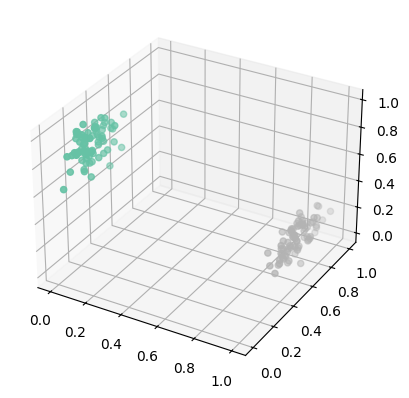

In [2]:
# # %matplotlib widget
blob0 = make_blobs(n_samples=150, n_features=3, centers=2, cluster_std=0.3, random_state=66) # 99 42
# blob0 = make_blobs(n_samples=150, n_features=3, centers=5, cluster_std=1.2, random_state=6666)
y = blob0[1]
X = blob0[0]
####################################3
## Load iris data

# iris = load_iris()
# # ind = y != 0
# ind = np.where(iris.target != 0)[0]

# X = iris.data[ind, :3]
# y = iris.target[ind]
# y = y - 1
# blob0 = [X, y]
# # visualize
# plt.scatter(X[:,2], X[:,1], c=y, cmap='viridis')

print(X.shape)
#############################
# plot the blobs in 3D"
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection='3d')
# ax.vieinit() what is the default view? type help(ax.vieinit)
# help(ax.vieinit)
CMAP = 'Set2'
pinot_clor_map = cm.get_cmap(CMAP)
ponit_clor = pinot_clor_map(y/y.max())

#####
lazy_scaler = MinMaxScaler()
blob0 = list(blob0)
blob0[0] = lazy_scaler.fit_transform(blob0[0])
#####

ax_3d.scatter(blob0[0][:,0], blob0[0][:,1], blob0[0][:,2], c=ponit_clor, )#cmap='tab10', )

In [3]:
class Simple_P_wrapper:
    def __init__(self, P, Pinv):
        self.P = P
        self.Pinv = Pinv
    def __call__(self, x):
        return self.P(x)
    def transform(self, x):
        return self.P.transform(x)
    def inverse_transform(self, x):
        return self.Pinv.transform(x)

    def fit(self, x, y=None, clf=None):
        X2d = self.P.fit_transform(x)
        self.X2d = X2d
        self.Pinv.fit(X2d, x )
        return self

# p = UMAP(n_components=2, random_state=0, n_neighbors=30, min_dist=0.9)
P = TSNE(n_components=2, random_state=0)
P = MDS(n_components=2, random_state=0)
# Pinv = NNinv_torch(dims=[2048]*4)
Pinv = Pinv_ilamp()
ilamp = Simple_P_wrapper(P, Pinv)
nninv = Simple_P_wrapper(P, NNinv_torch())
ssnp = SSNP(bottleneck_activation='linear', )
mdsinv_rand = Simple_P_wrapper(P, MDSinv())
mdsinv_near = Simple_P_wrapper(P, MDSinv(point_selection='nearest'))
rbf_inv = Simple_P_wrapper(P, RBFinv())

device:  cuda:0



In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(blob0[0])
# X = blob0[0]
y = blob0[1]

# NNinv_keras = 0
# NNinv_torch = 1
# deepview = 0
# ssnp = 0

# name_list = ['NNinv_keras', 'NNinv_torch', 'deepview', 'ssnp']
#get the none zero name
# name_plot = [name_list[i] for i in [NNinv_keras, NNinv_torch, deepview, ssnp] if i != 0][0]

# ssnp = SSNP(patience=5, opt='adam', bottleneck_activation='linear', verbose=0)
# proj = P_wrapper(NNinv_Keras=NNinv_keras, NNinv_Torch=NNinv_torch, deepview=deepview, ssnp=ssnp)

# # clf = SVC(probability=True)
# # clf = RandomForestClassifier()
# dbm = P_wrapper(NNinv_Torch=1, deepview=0, ssnp=0, NNinv_Keras=0)
# ssnp = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=0, ssnp=1)
# DV = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=1, ssnp=0)

clf = linear_model.LogisticRegression()
clf.fit(X, y)
ilamp.fit(X, y, clf)
nninv.fit(X, y, clf)
ssnp.fit(X, y)
mdsinv_rand.fit(X, y, clf)
rbf_inv.fit(X, y, clf)
# DV.fit(X, y, clf, lam=0.65)
# dbm.fit(X, y, clf)
# ssnp.fit(X, y, clf)


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Early stopping at epoch 96

Epoch 1/100



C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 68ms/step - loss: 2.5573 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.6871 - main_output_accuracy: 0.5070 - decoder_output_accuracy: 0.5493 - val_loss: 2.4878 - val_main_output_loss: 0.0000e+00 - val_decoder_output_loss: 0.6609 - val_main_output_accuracy: 0.3750 - val_decoder_output_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 2.4496 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.6456 - main_output_accuracy: 0.5070 - decoder_output_accuracy: 0.9718 - val_loss: 2.3409 - val_main_output_loss: 0.0000e+00 - val_decoder_output_loss: 0.5790 - val_main_output_accuracy: 0.3750 - val_decoder_output_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 2.3069 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.5672 - main_output_accuracy: 0.5070 - decoder_output_accuracy: 0.9789 - val_loss: 2.2023 - val_main_output_loss: 0.0000e+00 - val_decoder_output_lo

C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [5]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
# map_builder = MapBuilder(clf, ssnp, X, y, grid=100)
# ax_grad = map_builder.plot_gradient_map(ax=ax1)
# dv_map = map_builder.plot_prob_map(ax=ax2)
# plt.show()

5/5 [==============================] - 0s 2ms/step


[]

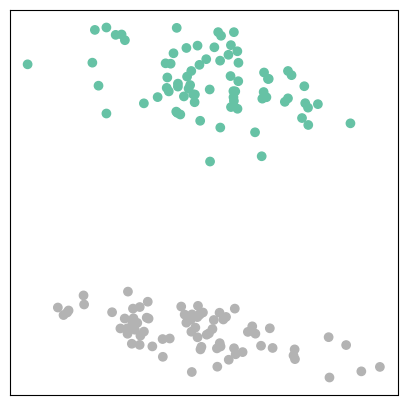

In [6]:
X_2d = ssnp.transform(blob0[0])
# scale the data to be between 0 and 1
# scaler2d = MinMaxScaler()
# X_2d = scaler2d.fit_transform(X_2d)


fig, ax = plt.subplots(figsize=(5,5) )
ax.scatter(X_2d[:,0], X_2d[:,1], c=ponit_clor)
# no ticks
ax.set_xticks([])
ax.set_yticks([])
# suqare aspect ratio`
# ax.set_aspect('equal')
# make directory if it doesn't exist
# if not os.path.exists('./figures/inlustrate_dbm'):
#     os.makedirs('./figures/inlustrate_dbm')
# fig.savefig('./figures/inlustrate_dbm/2d_1')

In [7]:
%matplotlib qt
GRID = 50
CMAP = 'cividis'


In [8]:
def plot_inverse_map(P_inv, GRID=GRID, clf=clf, ax=None, CMAP=CMAP):
    try:
        X_2d = P_inv.X2d
    except AttributeError:
        X_2d = P_inv.transform(blob0[0])
    xx, yy = np.meshgrid(np.linspace(X_2d[:,0].min(), X_2d[:,0].max(), GRID), np.linspace(X_2d[:,1].min(), X_2d[:,1].max(), GRID))
    XY = np.c_[xx.ravel(), yy.ravel()]
    XY_3d = P_inv.inverse_transform(XY)
    print(XY_3d.shape)
    XY_3d = scaler.inverse_transform(XY_3d)
    labels = clf.predict(XY_3d)
    ## grids with labels
    tab10 = cm.get_cmap(CMAP)
    labels_color = tab10(labels/labels.max())
    labels_color_2d = tab10(labels.reshape(GRID,GRID)/labels.max())
    # set alpha to 0.5
    labels_color_2d[:, : ,3] = 0.95
    print(labels_color_2d.shape)
    print(XY_3d[:,0].reshape(GRID,GRID).shape)
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    # ax_grid_dbm.scatter(XY_3d[:,0], XY_3d[:,1], XY_3d[:,2], c=labels_color[:], alpha=0.9, marker='+', cmap = 'tab10', s=100)
    ax.scatter(blob0[0][:,0], blob0[0][:,1], blob0[0][:,2], c=blob0[1], cmap='tab10', ec='k', s=7, linewidth=0.1, alpha=0.75)

    # ax_grid_dbm.plot_wireframe(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), colors=labels_color, alpha=0.5,)
    ax.plot_surface(
        XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), facecolors=labels_color_2d, #shade=False, #alpha=0.5, 
          linewidth=0.0, antialiased=False, rstride=1, cstride=1, )
    
    ratio = 0.1
    # ax.set_xlim(blob0[0][:,0].min()+ratio, blob0[0][:,0].max()*.9)
    # ax.set_ylim(blob0[0][:,1].min()+ratio, blob0[0][:,1].max()*.9)
    # ax.set_zlim(blob0[0][:,2].min()+ratio, blob0[0][:,2].max()*.9)
    # # # Make panes transparent
    # ax.xaxis.pane.fill = False # Left pane
    # ax.yaxis.pane.fill = False # Right pane
    # ax.zaxis.pane.fill = False # Right pane

    # # Remove grid lines
    # ax.grid(False)

    # # Remove tick labels
    # ax.set_xticklabels([])
    # ax.set_yticklabels([])
    # ax.set_zticklabels([])

    # # Transparent spines
    # ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # # Transparent panes
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # # No ticks
    # ax.set_xticks([]) 
    # ax.set_yticks([]) 
    # ax.set_zticks([])

    # backgroud color
    ax.set_facecolor((0.95, 0.95, 0.95, 0.0))
    ax.view_init(40, 155)

# plot_inverse_map(dbm)
# plt.show()
fig_3d = plt.figure(figsize=(25,5))
ax_ilmap = fig_3d.add_subplot(151, projection='3d')
ax_nninv = fig_3d.add_subplot(152, projection='3d')
ax_ssnp = fig_3d.add_subplot(153, projection='3d')
ax_mdsinv = fig_3d.add_subplot(154, projection='3d')
ax_mdsinv_near = fig_3d.add_subplot(155, projection='3d')
plot_inverse_map(ssnp, ax=ax_ssnp)
plot_inverse_map(ilamp, ax=ax_ilmap)
plot_inverse_map(nninv, ax=ax_nninv)
plot_inverse_map(mdsinv_rand, ax=ax_mdsinv)
plot_inverse_map(rbf_inv, ax=ax_mdsinv_near)

# set title
ax_ilmap.set_title('MDS+iLAMP')
ax_nninv.set_title('MDS+NNinv')
ax_ssnp.set_title('SSNP')
ax_mdsinv.set_title('MDSinv')
ax_mdsinv_near.set_title('RBF')



79/79 [==============================] - 0s 748us/step
(2500, 3)
(50, 50, 4)
(50, 50)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1018270782.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
100%|██████████| 500/500 [00:00<00:00, 40293.43it/s]

(2500, 3)
(50, 50, 4)
(50, 50)



C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1018270782.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1018270782.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)


(2500, 3)
(50, 50, 4)
(50, 50)
2500
(3,)
(3,)
(2500, 3)
(50, 50, 4)
(50, 50)
Phi_new:  (2500, 150)
(2500, 3)
(50, 50, 4)
(50, 50)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1018270782.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_15264\1018270782.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)


Text(0.5, 0.92, 'RBF')

In [9]:
mdsinv_near.inverse_transform(np.array([[0.5, 0.5]]))

AttributeError: 'MDSinv' object has no attribute 'X'

calculating probability map
calculating probability map


100%|██████████| 22495/22495 [00:00<00:00, 268357.10it/s]


calculating probability map


Text(0.5, 1.0, 'MDS + iLAMP')

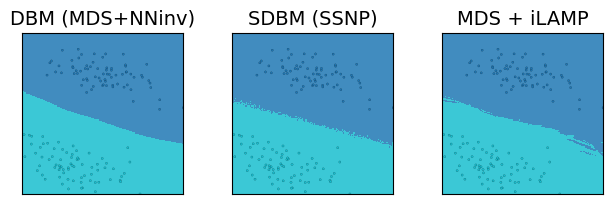

In [ ]:
# build a fig with 3 3d-axes
fig = plt.figure(figsize=(7.5,3.5))
ax1 = fig.add_subplot(131,  )
ax2 = fig.add_subplot(132, )
ax3 = fig.add_subplot(133, )
# white space between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.0)

dbm_builder = MapBuilder(clf, nninv, X, y, grid=150)
dbm_builder.plot_prob_map(ax=ax1,  proba=False)
# ssnp_builder = MapBuilder(clf, ssnp, X, y, grid=150)
# ssnp_builder.plot_prob_map(ax=ax2, proba=False)
DV_builder = MapBuilder(clf, ilamp, X, y, grid=150)
DV_builder.plot_prob_map(ax=ax3,  proba=False)
mds_builder = MapBuilder(clf, mdsinv_rand, X, y, grid=150)
mds_builder.plot_prob_map(ax=ax2,  proba=False)

aspect_ratio = 1.0
ax1.set_aspect(aspect_ratio)
ax2.set_aspect(aspect_ratio)
ax3.set_aspect(aspect_ratio)

# plot training data
dbm_builder.plot_training_data(ax=ax1, ec='k', linewidth=0.1)
# ssnp_builder.plot_training_data(ax=ax2, ec='k', linewidth=0.1 )
mds_builder.plot_training_data(ax=ax2, ec='k', linewidth=0.1 )
DV_builder.plot_training_data(ax=ax3, ec='k', linewidth=0.1 )

# not legend
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()

ax1.set_title('DBM (MDS+NNinv)', fontsize=14)
ax2.set_title('SDBM (SSNP)', fontsize=14)
ax3.set_title('MDS + iLAMP', fontsize=14)

# fig.savefig(r'..\papers\Intrinsic_Dim_paper\figures\2d_all.pdf', dpi=300, bbox_inches='tight')
# fig.savefig(r'..\papers\Intrinsic_Dim_paper\figures\2d_all.png', dpi=300, bbox_inches='tight')

In [ ]:
# %matplotlib qt

In [ ]:
# # use vispy to create a 3d mesh with color for X_3d and labels

# import vispy
# from vispy import app, scene
# from vispy.scene import visuals
# from vispy.visuals.transforms import STTransform

# # Create canvas
# canvas = scene.SceneCanvas(keys='interactive', show=True)
# # canvas.size = 800, 600
# canvas.show()

# # Create a ViewBox to display the cube with interactive arcball
# view = canvas.central_widget.add_view()
# view.camera = 'turntable'  # or try 'arcball'
# # white background
# view.bgcolor = [.8, .8, .8, 1]


# # Add a colored 3D axis for orientation
# # axis = scene.visuals.XYZAxis(parent=view.scene)

# ## plot blob as small spheres
# print(type(blob0[0]))
# vis = scene.visuals.Markers(
#     pos=blob0[0],
#     size=10,
#     antialias=0,
#     face_color=ponit_clor,
#     edge_color='white',
#     edge_width=0,
#     # scaling=True,
#     # spherical=True,
# )
# vis.parent = view.scene

# ## plot vertices as small spheres
# print(type(XY_3d))
# gridnd = scene.visuals.Markers(
#     pos=XY_3d,
#     size=10,
#     antialias=0,
#     face_color='black',
#     edge_color='white',
#     edge_width=0,
#     scaling=False,
    
#     # spherical=True,  
# )

# gridnd.parent = view.scene

# gridnd_labeled = scene.visuals.Markers(
#     pos=XY_3d,
#     size=10,
#     antialias=0,
#     face_color=labels_color,
#     edge_color='white',
#     edge_width=0,
#     scaling=False,
    
#     # spherical=True,  
# )
# gridnd_labeled.parent = None


# # turn the 3d points into a faces
# faces = []
# for i in range(0, GRID-1, 2):
#     for j in range(0, GRID-1, 2):
#         faces.append([i, i+1, j, j+1])
   
# # create the mesh
# # mesh = vispy.visuals.surface_plot.SurfacePlotVisual(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID))
# mesh = visuals.SurfacePlot(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), parent=view.scene) #, shading='flat'
# # add the mesh to the view
# # view.add(mesh)
# # (vertices=XY_3d.reshape(GRID, GRID, 3), parent=view.scene,)

# mesh2 = visuals.SurfacePlot(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), parent=view.scene) #, shading='flat'
# mesh3 = visuals.SurfacePlot(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), parent=view.scene) #, shading='flat'

# ## surface
# # mesh = scene.visuals.Mesh(XY_3d.reshape(GRID,GRID,3),  parent=view.scene)
# # set color vertices color to labels and set face color to None
# color_to_plot = [id_color,  labels_color, grads_color]
# for i in range(3):
#     # color_to_plot[i] = color_to_plot[i].reshape(GRID,GRID,4)
#     color_to_plot[i][:,3] = 0.9

# # set ahpha to 0.5
# # color_to_plot[:,3] = 0.7

# cur_ind = 0
# mesh.mesh_data.set_vertex_colors(color_to_plot[0])
# mesh2.mesh_data.set_vertex_colors(color_to_plot[1])
# mesh3.mesh_data.set_vertex_colors(color_to_plot[2])



# #draw the mesh by draw lines
# lines = []
# for h_line in XY_3d.reshape(GRID,GRID,3):
#     hline = scene.visuals.Line(pos=h_line, color='k', parent=view.scene, width=3)
#     lines.append(hline)
# for v_line in XY_3d.reshape(GRID,GRID,3).transpose(1,0,2):
#     vmesh = scene.visuals.Line(pos=v_line, color='k', parent=view.scene, width=3)
#     lines.append(vmesh)

# ## draw a axis to show the space better
# # axis = scene.visuals.XYZAxis(parent=view.scene) 
# scene.visuals.GridLines(parent=view.scene)
# ## draw 3 palnes of mesh mannually to show the space better
# # plane = scene.visuals.Plane(parent=view.scene, width=10, height=10, color='k', edge_color='k', edge_width=1)
# # plane.transform = STTransform(translate=(0, 0, 0))



# # # camera center on the mesh
# view.camera.center = mesh.mesh_data.get_vertices().mean(axis=0)
# # alpha = 0.5

# # # mesh.mesh_data.set_face_colors([[0,0,0,0]]*1152)
# # face = np.array(mesh.mesh_data.get_faces())
# # ver = np.array(mesh.mesh_data.get_vertices())
# # print(mesh.mesh_data.get_faces())
# # print(mesh.mesh_data.get_vertices().shape)
# # # mesh.shading = 'flat'

# ## key press event
# def on_key_press(event):
#     if event.key == 's':
#         mesh.shading = 'smooth' if mesh.shading == 'flat' else 'flat'
#         mesh2.shading = 'smooth' if mesh2.shading == 'flat' else 'flat'
#         mesh3.shading = 'smooth' if mesh3.shading == 'flat' else 'flat'
#         canvas.update()
#     # if event.key == 'n': shade = 'none'
#     if event.key == 'n':
#         mesh.shading = None
#         mesh2.shading = None
#         mesh3.shading = None
#         canvas.update()
    
#     if event.key == 'c':
#         # if gridnd color is black, set it to labels_color; else set it to black
#         if gridnd.parent is None:
#             gridnd.parent = view.scene
#             gridnd_labeled.parent = None
#         else:
#             gridnd.parent = None
#             gridnd_labeled.parent = view.scene

#     if event.key == ' ':
#         if mesh.parent is None:
#             mesh.parent = view.scene
#             for l in lines:
#                 l.parent = view.scene
#         else:
#             mesh.parent = None
#             for l in lines:
#                 l.parent = None   
#         canvas.update()

#     if event.key == 'Right':
#         # print('Right')
#         global cur_ind
#         cur_ind = (cur_ind + 1) % len(color_to_plot)
        
#         mesh.mesh_data.set_vertex_colors(color_to_plot[cur_ind])
#         print(cur_ind)
#         canvas.update()
        
#     if event.key == '1':
#         mesh.parent = view.scene
#         mesh2.parent = None
#         mesh3.parent = None
#     if event.key == '2':
#         mesh.parent = None
#         mesh2.parent = view.scene
#         mesh3.parent = None
#     if event.key == '3':
#         mesh.parent = None
#         mesh2.parent = None
#         mesh3.parent = view.scene
#     # if o , save image
#     if event.key == 'o':
#         image = canvas.render( )
#         ## save image at ./figures/inlustrate_dbm/test.png
#         date = datetime.now()
#         # save_name = name_plot + date
#         save_name = name_plot + str(date.year) + str(date.month) + str(date.day) + str(date.hour) + str(date.minute) + str(date.second)
#         vispy.io.write_png('./figures/inlustrate_dbm/' + save_name + '.png', image)
#         print('=====image saved at ./figures/inlustrate_dbm/' + save_name + '.png')
    
#     # if p , take a screenshot
#     if event.key == 'j':
#         vispy.io.write_png("./figures/inlustrate_dbm/3d_1.png", vispy.gloo.util._screenshot((0, 0, canvas.size[0], canvas.size[1])))
#         print("=====png written")
#     if event.key == 'k':
#         vispy.io.write_png("./figures/inlustrate_dbm/3d_2.png", vispy.gloo.util._screenshot((0, 0, canvas.size[0], canvas.size[1])))
#         print("=====png written")
#     if event.key == 'l':
#         vispy.io.write_png("./figures/inlustrate_dbm/3d_3.png", vispy.gloo.util._screenshot((0, 0, canvas.size[0], canvas.size[1])))
#         print("=====png written")

#     ## use up and down to change the alpha of the both mesh
#     # if event.key == 'Up':
#     #     # nonlocal alpha
#     #     alpha = color_to_plot[0][0][3]
#     #     alpha = alpha + 0.1
#     #     if alpha > 1:
#     #         alpha = 1
#     #     color_to_plot[0][:,3] = alpha
#     #     color_to_plot[1][:,3] = alpha
#     #     mesh.mesh_data.set_vertex_colors(color_to_plot[0])
#     #     mesh2.mesh_data.set_vertex_colors(color_to_plot[1])
#     #     canvas.update()
#     # if event.key == 'Down':
#     #     alpha = color_to_plot[0][0][3]
#     #     # nonlocal alpha
#     #     alpha = alpha - 0.1
#     #     if alpha < 0:
#     #         alpha = 0
#     #     color_to_plot[0][:,3] = alpha
#     #     color_to_plot[1][:,3] = alpha
#     #     mesh.mesh_data.set_vertex_colors(color_to_plot[0])
#     #     mesh2.mesh_data.set_vertex_colors(color_to_plot[1])
#     #     canvas.update()

# if __name__ == '__main__' and sys.flags.interactive == 0:
#     canvas.events.key_press.connect(on_key_press)
#     ##squre the window 
#     # canvas.size = 1000, 1000
#     app.run()
